In [1]:
!pip install "tensorflow_hub==0.4.0"
#!pip install tf-nightly

In [2]:
#import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
#tf.compat.v1.disable_eager_execution()
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow.keras import layers

In [3]:
CLASSIFIER_URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"

In [4]:
IMAGE_RES = 224
model = tf.keras.Sequential([
    hub.KerasLayer(CLASSIFIER_URL,input_shape=(IMAGE_RES,IMAGE_RES,3))
])

In [5]:
import numpy as np
import PIL.Image as Image
grace_hopper = tf.keras.utils.get_file("image.jpg","https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg")

In [6]:
grace_hopper

'C:\\Users\\dany\\.keras\\datasets\\image.jpg'

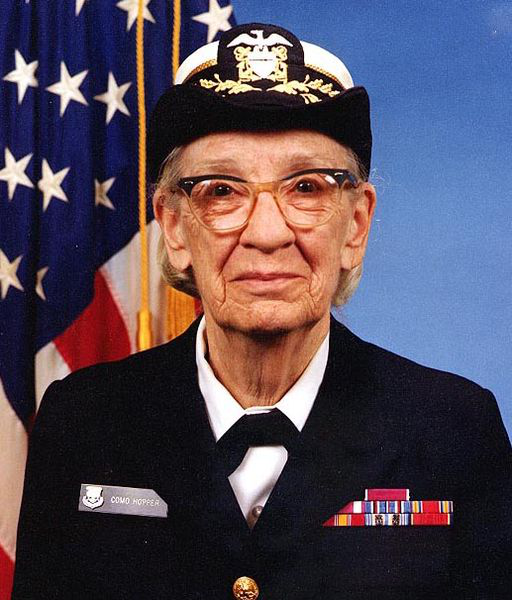

In [7]:
Image.open(grace_hopper)

In [8]:
grace_hopper = Image.open(grace_hopper).resize((IMAGE_RES,IMAGE_RES))

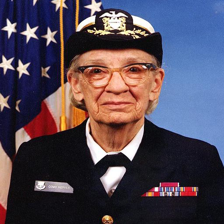

In [9]:
grace_hopper

In [10]:
grace_hopper = np.array(grace_hopper)/255.0

In [11]:
grace_hopper.shape

(224, 224, 3)

In [12]:
result = model.predict(grace_hopper[np.newaxis, ...])

In [13]:
result.shape

(1, 1001)

In [14]:
predicted_class = np.argmax(result[0],axis=-1)

In [15]:
predicted_class

653

In [16]:
label_path = tf.keras.utils.get_file('ImageNetLabels.txt',"https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt")

In [17]:
imagenet_labels = np.array(open(label_path).read().splitlines())

In [18]:
imagenet_labels

array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

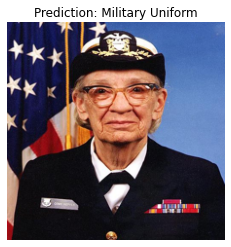

In [19]:
plt.imshow(grace_hopper)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

In [20]:
# Cats And Dogs

In [21]:
setattr(tfds.image_classification.cats_vs_dogs, '_URL',"https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip")
(train_examples, validation_examples), info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True,
)

In [22]:
info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='C:\\Users\\dany\\tensorflow_datasets\\cats_vs_dogs\\4.0.0',
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Ja

In [23]:
train_examples

<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [24]:
num_examples = info.splits['train'].num_examples

In [25]:
num_examples

23262

In [26]:
num_classes = info.features['label'].num_classes

In [27]:
num_training_examples = 0
num_validation_examples = 0
for example in train_examples:
    num_training_examples +=1
for example in validation_examples:
    num_validation_examples += 1

In [28]:
def format_image(image,label):
    image = tf.image.resize(image,(IMAGE_RES,IMAGE_RES))/255.0
    return image,label

In [29]:
BATCH_SIZE = 32
train_batches = train_examples.shuffle(num_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)

In [30]:
validation_batches = validation_examples.map(format_image).batch(BATCH_SIZE).prefetch(1)

In [31]:
image_batch,label_batch= next(iter(train_batches.take(1)))

In [32]:
image_batch = image_batch.numpy()
label_batch = label_batch.numpy()

In [33]:
image_batch.shape

(32, 224, 224, 3)

In [34]:
label_batch.shape

(32,)

In [35]:
result_batch = model.predict(image_batch)

In [36]:
result_batch

array([[ 0.2275897 , -1.028375  , -0.63194984, ...,  0.69290394,
        -0.35475612, -0.16436455],
       [ 0.27923086,  1.4271715 ,  0.78813267, ..., -0.20851564,
        -0.18917744, -0.16566077],
       [ 0.27940956, -0.79444766,  0.9253063 , ...,  0.29342073,
        -2.3482504 , -0.10821336],
       ...,
       [ 0.20157343, -0.8470509 ,  0.1688606 , ...,  0.50930995,
         0.10258049,  1.8537538 ],
       [ 0.43884203,  0.11429058,  1.3225752 , ...,  0.51007104,
        -0.39083916,  2.4137588 ],
       [ 0.37498912,  1.4918555 ,  0.39029098, ...,  0.10308134,
         0.14051464,  0.9608972 ]], dtype=float32)

In [37]:

predicted_class_names = imagenet_labels[np.argmax(result_batch,axis=-1)]

In [38]:
predicted_class_names

array(['German short-haired pointer', 'Labrador retriever',
       'Chesapeake Bay retriever', 'tabby', 'Egyptian cat', 'Eskimo dog',
       'miniature pinscher', 'Border terrier', 'Australian terrier',
       'cocker spaniel', 'tabby', 'Norwegian elkhound', 'chow', 'tabby',
       'tabby', 'tiger cat', 'toy terrier', 'Egyptian cat', 'bucket',
       'tiger cat', 'lynx', 'titi', 'Great Dane', 'beagle', 'Persian cat',
       'lynx', 'Persian cat', 'Siberian husky', 'Chihuahua', 'tabby',
       'Persian cat', 'Egyptian cat'], dtype='<U30')

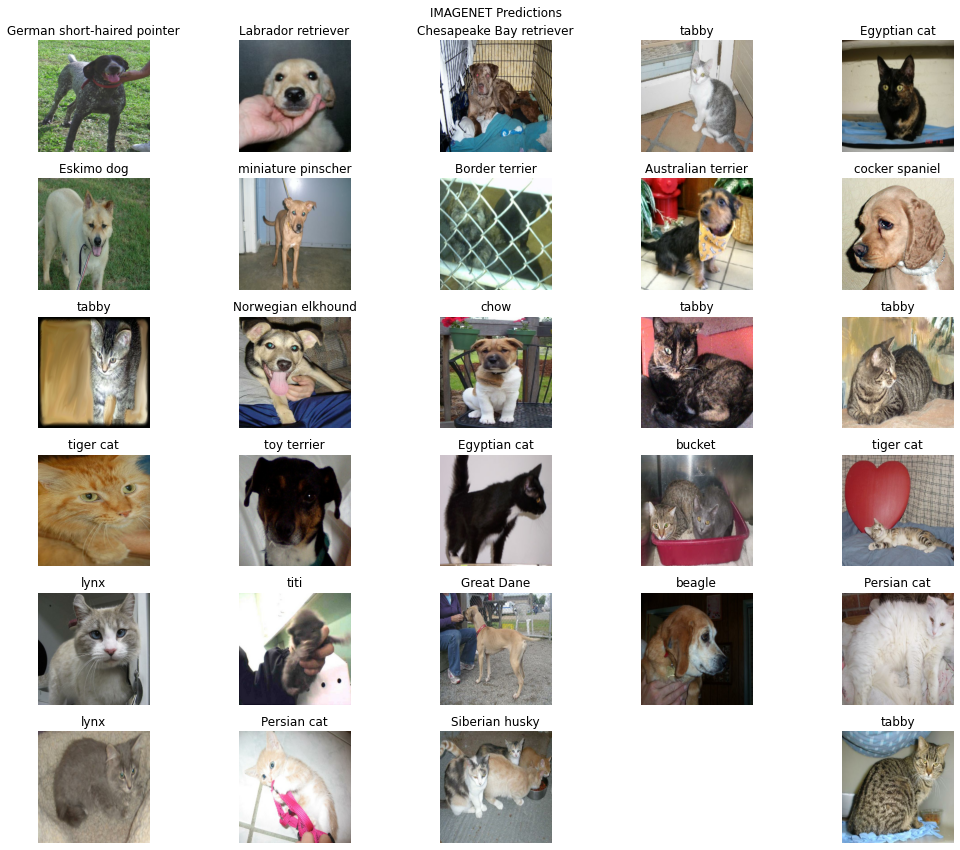

In [39]:

plt.figure(figsize=(15,12))
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(predicted_class_names[n])
    plt.axis('off')
    plt.tight_layout()
    _ = plt.suptitle("IMAGENET Predictions")

In [40]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2"

In [41]:
feature_extractor = hub.KerasLayer(URL,input_shape=(IMAGE_RES,IMAGE_RES,3))

In [42]:
feature_batch = feature_extractor(image_batch)

In [43]:
feature_batch.shape

TensorShape([32, 1280])

In [44]:
feature_extractor.trainable = False

In [45]:
model = tf.keras.Sequential([
    feature_extractor,
    layers.Dense(2,activation='softmax')
])

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [47]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [48]:
Epochs = 6
history = model.fit(train_batches,epochs=Epochs,
                   validation_data=validation_batches)

Epoch 1/6
582/582 [==============================] - 64s 91ms/step - loss: 0.0592 - accuracy: 0.9787 - val_loss: 0.0368 - val_accuracy: 0.9877
Epoch 2/6
582/582 [==============================] - 51s 82ms/step - loss: 0.0312 - accuracy: 0.9890 - val_loss: 0.0303 - val_accuracy: 0.9895
Epoch 3/6
582/582 [==============================] - 51s 82ms/step - loss: 0.0249 - accuracy: 0.9912 - val_loss: 0.0309 - val_accuracy: 0.9895
Epoch 4/6
582/582 [==============================] - 51s 82ms/step - loss: 0.0221 - accuracy: 0.9922 - val_loss: 0.0299 - val_accuracy: 0.9908
Epoch 5/6
582/582 [==============================] - 50s 82ms/step - loss: 0.0195 - accuracy: 0.9935 - val_loss: 0.0310 - val_accuracy: 0.9899
Epoch 6/6
582/582 [==============================] - 50s 82ms/step - loss: 0.0171 - accuracy: 0.9945 - val_loss: 0.0324 - val_accuracy: 0.9905


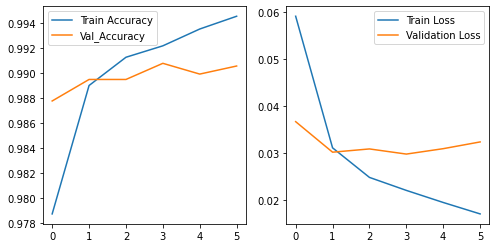

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(Epochs)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Train Accuracy')
plt.plot(epochs_range,val_acc,label='Val_Accuracy')
plt.legend(loc=0)
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Train Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc=0)
plt.show()

In [51]:
class_names = np.array(info.features['label'].names)

In [52]:
class_names

array(['cat', 'dog'], dtype='<U3')

In [53]:
predicted_batch = model.predict(image_batch)

In [55]:
predicted_batch.round()

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [56]:
predicted_batch = tf.squeeze(predicted_batch).numpy()

In [57]:
predicted_batch

array([[8.9643354e-06, 9.9999106e-01],
       [2.2510534e-05, 9.9997747e-01],
       [1.7324238e-04, 9.9982673e-01],
       [9.9998891e-01, 1.1050972e-05],
       [9.9999392e-01, 6.0809384e-06],
       [7.8052736e-04, 9.9921942e-01],
       [3.6867944e-04, 9.9963129e-01],
       [9.5071306e-07, 9.9999905e-01],
       [5.7875950e-05, 9.9994206e-01],
       [2.9455119e-05, 9.9997056e-01],
       [9.9993992e-01, 6.0030354e-05],
       [2.5747036e-05, 9.9997425e-01],
       [1.6941076e-04, 9.9983060e-01],
       [9.9987316e-01, 1.2687343e-04],
       [9.9998069e-01, 1.9312087e-05],
       [9.9999785e-01, 2.1763506e-06],
       [1.9090246e-05, 9.9998093e-01],
       [9.9999976e-01, 2.4246722e-07],
       [9.9997115e-01, 2.8870661e-05],
       [9.9999273e-01, 7.3165802e-06],
       [9.9999952e-01, 5.1416680e-07],
       [8.5395533e-01, 1.4604472e-01],
       [2.4194992e-03, 9.9758053e-01],
       [2.0480684e-03, 9.9795192e-01],
       [9.9647862e-01, 3.5214319e-03],
       [9.9998283e-01, 1.

In [58]:
predicted_ids = np.argmax(predicted_batch,axis=-1)

In [59]:
predicted_ids

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [60]:
predicted_class_names = class_names[predicted_ids]

In [61]:
predicted_class_names

array(['dog', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog',
       'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat',
       'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'cat',
       'cat', 'dog', 'cat', 'cat', 'cat'], dtype='<U3')

In [62]:
print("Labels: ",label_batch)
print("Predicted_labels:",predicted_ids)

Labels:  [1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0]
Predicted_labels: [1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0]


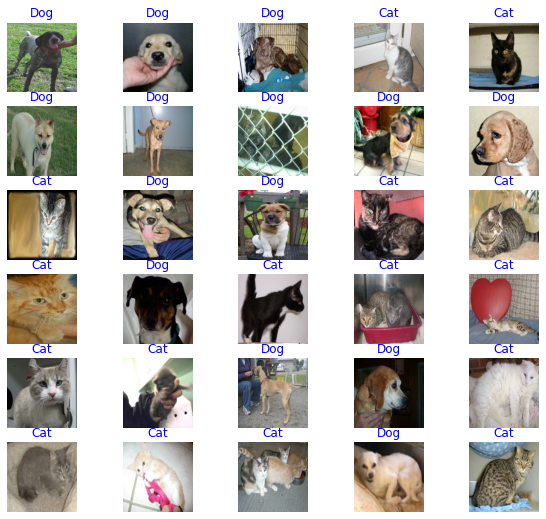

In [63]:
plt.figure(figsize=(10,9))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.imshow(image_batch[i])
    color = "blue" if predicted_ids[i] == label_batch[i] else "red"
    plt.title(predicted_class_names[i].title(),color=color)
    plt.axis('off')
    _= plt.suptitle("Model Prediction()")